# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<05>`
* Students: `<Wentao Feng, Yunbei Wang, Yan Fu, Zhaodong Sun>`
* Dataset: `<Flight route>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np
adjacency =  np.load('adj.npy')# the adjacency matrix
adjacency = adjacency+adjacency.T
adjacency[adjacency>0] = 1 # convert to symmetric matrix
n_nodes =  adjacency.shape[0]# the number of nodes in the network
n_edges =  adjacency.sum()/2# the number of edges in the undirected network

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [3]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [4]:
def erdos_renyi(n, p, seed=10):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Your code here.
    np.random.seed(seed)
    tmp = np.random.rand(n,n)# generate an N*N matrix and fill in number uniformly randomly chose from (0,1) 
    tmp[tmp>=p] = 1
    tmp[tmp<p] = 0
    er_graph = np.triu(1-tmp,1)
    # set the points with probability higher than p to 1 and else to 0, take the upper triangle without diagonal
    
    # create symmetric matrix
    adjacency = er_graph+er_graph.T
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

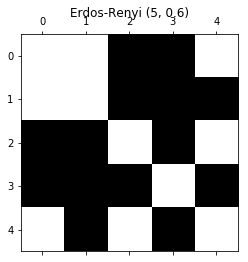

In [5]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

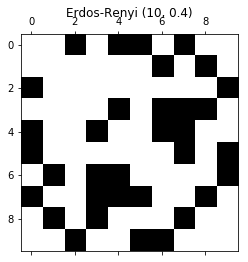

In [6]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

**Your answer here.**

For Erdős–Rényi model, since the number of nodes is certain, the only parameter we need to choice is the edge probability. We can consider the number of edges of our flight route graph as the expectation of links number in Erdős–Rényi model. The expected number of links in random graph is: 
$$L = \frac{ pN(N-1) }{ 2 }$$
Then we can calculate the edge probability with expectation of links number.

Text(0.5, 1.05, 'Random Graph for Flight Route')

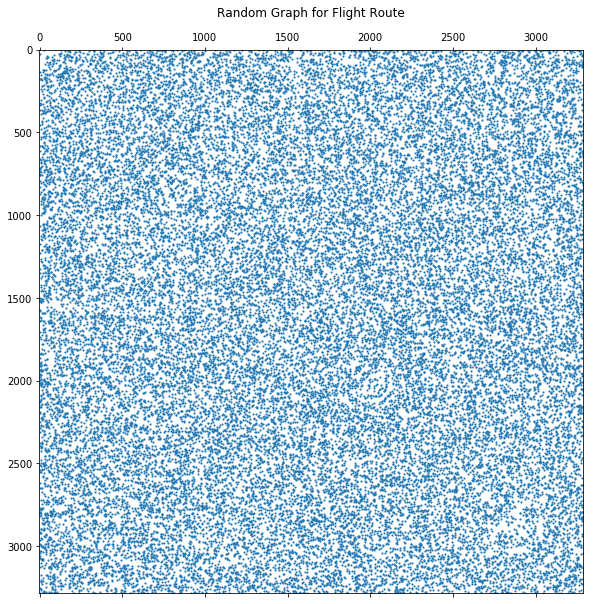

In [7]:
# Your code here.
er_p = 2*n_edges/n_nodes/(n_nodes-1)
er_flight = erdos_renyi(n_nodes,er_p)
fig, ax = plt.subplots(figsize = (10, 10))
plt.spy(er_flight,markersize=1)
plt.title('Random Graph for Flight Route')

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [8]:
def barabasi_albert(n, m=2, seed=10):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    """
    Algorithm:
    1) Add m0 nodes to G.
    2) Connect every node in G to every other node in G, i.e. create a complete graph.
    3) Create a new node i.
    4) Pick a node j uniformly at random from the graph G. Set P = (k(j)/k_tot)^a.
    5) Pick a real number R uniformly at random between 0 and 1.
    6) If P > R then add j to i's adjacency list.
    7) Repeat steps 4 - 6 until i has m nodes in its adjacency list.
    8) Add i to the adjacency list of each node in its adjacency list.
    9) Add i to to the graph.
    10) Repeat steps 3 - 9 until there are N nodes in the graph.
    """
    # Your code here.
    np.random.seed(seed)
    adj = np.zeros([n,n])
    # adj[:m+1,:m+1] = 1 - np.eye(m+1, m+1) # initial state (fully connected)
    adj[:m+1,:m+1] = erdos_renyi(m+1,0.6) # create connected random initial network
    for i in range(m+1,n): # Create a new node i.
        adj_now = adj[:i, :i]
        if np.sum(adj_now)==0:
            p = np.zeros((adj_now.shape[0], 1))
        else:
            p = np.sum(adj_now, axis=1, keepdims = True)/np.sum(adj_now) # probability for i-th node to connect nodes
        connect_idx = []
        while len(connect_idx)<m:
            connect_idx_new = np.where(np.random.rand(p.shape[0], 1)<=p)[0] #  Pick  real numbers R uniformly at random between 0 and  If P > R then add j to i's adjacency list.
            connect_idx = connect_idx + connect_idx_new.tolist() 
            connect_idx = np.unique(connect_idx).tolist()
        adj[i, connect_idx] = 1
        adj[connect_idx, i] = 1
        if i%100 == 0:
            print('The process completed ', np.round(100 * i / n) , '%', end='\n', sep='')
    return adj

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

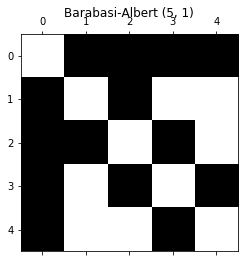

In [9]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

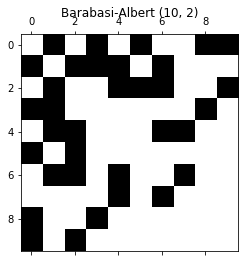

In [10]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [11]:
# Your code here.
num_edge = np.round(np.sum(adjacency)/n_nodes/2)
ba_adj = barabasi_albert(n_nodes, m=int(num_edge), seed=10)

The process completed 3.0%
The process completed 6.0%
The process completed 9.0%
The process completed 12.0%
The process completed 15.0%
The process completed 18.0%
The process completed 21.0%
The process completed 24.0%
The process completed 27.0%
The process completed 30.0%
The process completed 33.0%
The process completed 37.0%
The process completed 40.0%
The process completed 43.0%
The process completed 46.0%
The process completed 49.0%
The process completed 52.0%
The process completed 55.0%
The process completed 58.0%
The process completed 61.0%
The process completed 64.0%
The process completed 67.0%
The process completed 70.0%
The process completed 73.0%
The process completed 76.0%
The process completed 79.0%
The process completed 82.0%
The process completed 85.0%
The process completed 88.0%
The process completed 91.0%
The process completed 94.0%
The process completed 97.0%


**Your answer here**

Here we set the random seed = 10 so to insure that the BA graph we creat is always connected.
The size of the graph is the number of nodes of our flight route graph. 
Number of edges to add each time is the number of edges per node. The result should also be converted to an integer.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

Text(2.75, 21703.0, '21303.0')

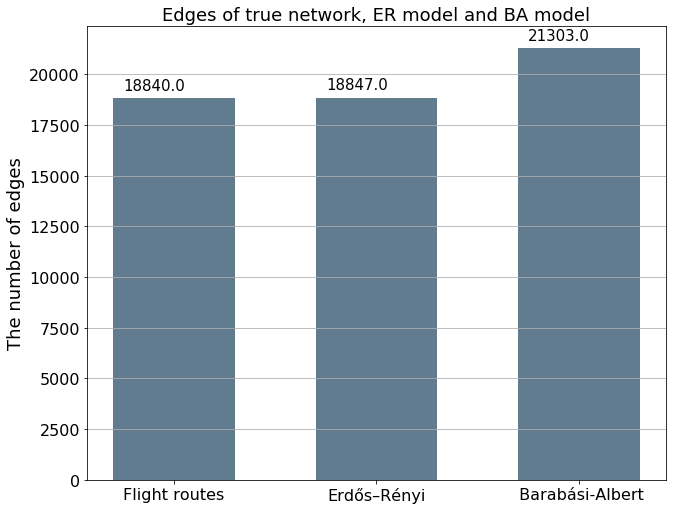

In [12]:
# masked_adjacency = (adjacency.T + adjacency) # transform the graph into undirected graph
# masked_adjacency[masked_adjacency > 0] = 1 # transform the adjacency matrix into unweighted graph
edge_flight = n_edges # calculate the number of edges of our graph
edge_er = np.sum(er_flight) / 2 # calculate the number of edges of ER model graph
edge_ba = np.sum(ba_adj) / 2 # calculate the number of edges of BA model graph

# plot the numbers of edge of three graphs
fig1, ax1 = plt.subplots(figsize = (10,7))
ax1.tick_params(labelsize = 16)
plt.ylabel('The number of edges',fontdict={'fontsize':18})
plt.xticks([1, 2, 3], ['Flight routes','Erdős–Rényi', ' Barabási-Albert'])
plt.grid(axis = 'y')
plt.tight_layout()
ax1.bar([1, 2, 3],[edge_flight, edge_er, edge_ba], width = 0.6,color='#607c8e')
ax1.set_title('Edges of true network, ER model and BA model',fontdict={'fontsize':18})
ax1.text(0.75, edge_flight +400, str(edge_flight), fontdict={'fontsize':15})
ax1.text(1.75, edge_er +400, str(edge_er), fontdict={'fontsize':15})
ax1.text(2.75, edge_ba +400, str(edge_ba), fontdict={'fontsize':15})


***Comment***: 

We can see that the number of edges of ER model and BA model is very close to that of true graph. It somehow shows that we create ER model and BA model correctly.

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

One thing to notice is the way we dealed with zeros in degree distribution. In moodle the TA said we should group degree distribution into bins such that no bins have zeros. But in our graph we found it hard to balance between 'no zeros' and informative distribution plot. If we wanted to eliminate all zeros with grouping in bins, then we would have to set very large bin width and lost many information. 

So after long consideration, we decided to use fine bin (binwidth = 10) and at the same time set the zero bins with a really small number (1e-6). Also, notice that we did not re-normalize the degree distribution after replacing zeros. This was because the number of zero bins was not very large, and number of zero bins multiplied 1e-5 was also very small in each distribution (smaller than 1e-5). We thought this small number could be regarded as float number fluctuation and thus did not influence the whole distribution much. So we replaced zeros with 1e-6 and believed it would not influence too much.

In [13]:
def kl_divergence(p_, q_):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    p = np.copy(p_)
    q = np.copy(q_)
    p[p == 0] = 1e-6 # avoid 0 in log.
    q[q == 0] = 1e-6
    kl = p @ np.log(p / q)
    return kl

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [14]:
def degree_distribution(graph_matrix,upper):
    """
    The function is used to calculate normalized degree distribution for a given graph.
    
    Inputs:
    
    graph_matrix:
        The np.array matrix storing graph information.
        
    upper:
        The upper bound of the degree distribution. 
        We use the maximum upper of several graphs to produce same distribution range.
        
    Output:
    degree_dist:
        The degree distribution of graph_matrix.
            
    """
    upper = int(upper / 10) * 10 + 10 # the width of bin being 10
    figs,_ = plt.subplots(nrows=1, ncols=3)
    arr,_,_ = plt.hist(np.sum(graph_matrix,axis=0),bins = np.arange(0,upper,10))# arr is the frequency counts for each bin
    figs.clear()
    degree_dist = arr/np.sum(arr) # normalise the degree distribution
    return degree_dist

In [15]:
upper = max(max(np.sum(adjacency,axis=0)), max(np.sum(er_flight,axis=0)),max(np.sum(ba_adj,axis=0)))

flight_degree_distr = degree_distribution(adjacency,upper)
er_degree_distr = degree_distribution(er_flight,upper)
ba_degree_distr = degree_distribution(ba_adj,upper)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
print('The KL divergence between flight routes and Erdős–Rényi model is: {0:.2f}.'.format(
    kl_divergence(flight_degree_distr, er_degree_distr)))

print('The KL divergence between flight routes and Barabási-Albert model is: {0:.2f}.'.format(
    kl_divergence(flight_degree_distr, ba_degree_distr)))

The KL divergence between flight routes and Erdős–Rényi model is: 1.52.
The KL divergence between flight routes and Barabási-Albert model is: 0.22.


***Comment***: From the definition of KL divergence, it stands for the extent of unlikelihood between two probability distribution. Namely, the greater KL divergence means the greater unliklihood. According to the result, we can conclude that our real graph and BA model graph share more similarity.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

KL divergence measures the difference of two distribution. The closer two distributions they are, the smaller KL divergence we get. From question 7, we have a very small KL divergence between our true graph and the BA model, while KL divergence is much larger for ER model. And this is consistent with the histogram we plot below: True graph distribution is much closer to BA model distribution than that of ER model.

The reason can be that, there are many big hubs inside flight route graph, which is consistent with real world situation. For BA model it can simulate big hubs, while in ER model there is no preference for hubs and thus causes huge difference.

Text(0.5, 0.98, 'degree distribution historgrams for all three networks')

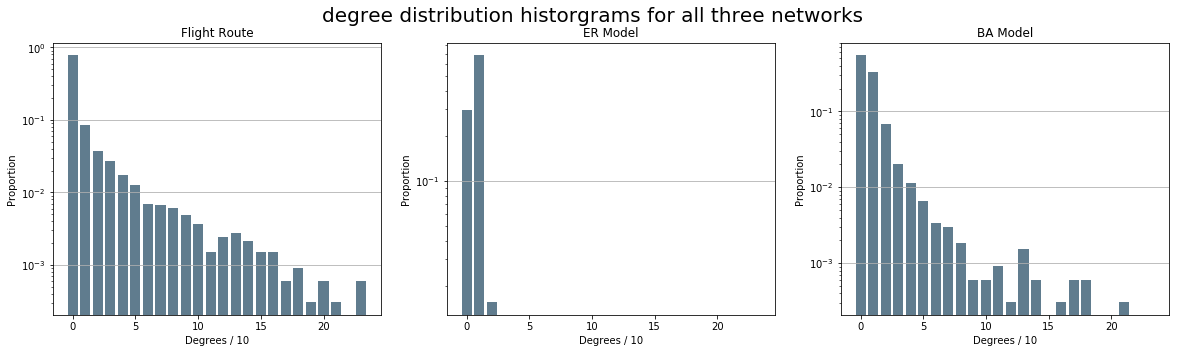

In [17]:
labels = ['Flight Route','ER Model','BA Model']
data = [flight_degree_distr,er_degree_distr,ba_degree_distr]
figs, axs = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for index, axes_index in enumerate(axs):
    data_plot = data[index]
    axes_index.bar(np.arange(len(data_plot)),data_plot,log=True,color='#607c8e')
    axes_index.set_xlabel('Degrees / 10')
    axes_index.set_ylabel('Proportion')
    axes_index.set_title(labels[index])
    axes_index.grid(axis = 'y')
figs.suptitle('degree distribution historgrams for all three networks', fontsize = 20)

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

Absolutely not. The degree distribution gets deduced information of a graph. We lose information on connection relationship of each node and thus, the same degree distribution can not guarantee generating the same graph with same links at all. In other words, every signal graph has its own distribution, but one distribution may correspond to many graph. This is extremly true when nodes in graph and their links have unique meaning.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

Comparing the distributions shown in Question 8, we noticed that even though BA model was very close to our true graph distribution, they differed in number of huge hubs. The true graph had more hubs than BA model, so to improve simulation, we decided to try on `Superlinear Preferential Attachment model`. In this model, huge hubs are even more preferable than BA model when a new node comes. So we thought with superlinear model, we should observe more hubs in higher degree, hence more similar to the property of true graph.


### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

The Superlinear Preferential Attachment model is based on the BA model (the model building process is the same) but with an exponential parameter which modifies the probability that a new node connects to another node. And this parameter is larger than 1, which means a new node is more likely to link a highly linked node and almost all nodes will be connected to a few super-hubs

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [18]:
# Your code here.
def superlinear_model(n, m=2, a=1.1, seed=10):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    a: flost
        The exponential parameter controlling the probability of linking to highly connected nodes.
        Equal to 1 for BA model.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Your code here.
    np.random.seed(seed)
    adj = np.zeros([n,n])
    adj[:m+1,:m+1] = erdos_renyi(m+1,0.6) # create connected random initial network
    for i in range(m+1,n):
        adj_now = adj[:i, :i]
        if np.sum(adj_now)==0:
            p = np.zeros((adj_now.shape[0], 1))
        else:
            p = (np.sum(adj_now, axis=1, keepdims = True)/np.sum(adj_now))**a # probability for i-th node to connect nodes
        connect_idx = []
        while len(connect_idx)<m:
            connect_idx_new = np.where(np.random.rand(p.shape[0], 1)<=p)[0]
            connect_idx = connect_idx + connect_idx_new.tolist()
            connect_idx = np.unique(connect_idx).tolist()
        adj[i, connect_idx] = 1
        adj[connect_idx, i] = 1
    return adj

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [19]:
sp_adj=superlinear_model(n_nodes, m=int(num_edge), seed=10)

In [20]:
upper = max(max(np.sum(adjacency,axis=0)), max(np.sum(sp_adj,axis=0)),max(np.sum(ba_adj,axis=0)))

flight_degree_distr2 = degree_distribution(adjacency,upper)
sp_degree_distr2 = degree_distribution(sp_adj,upper)
ba_degree_distr2 = degree_distribution(ba_adj,upper)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 0.98, 'degree distribution historgrams for all three networks')

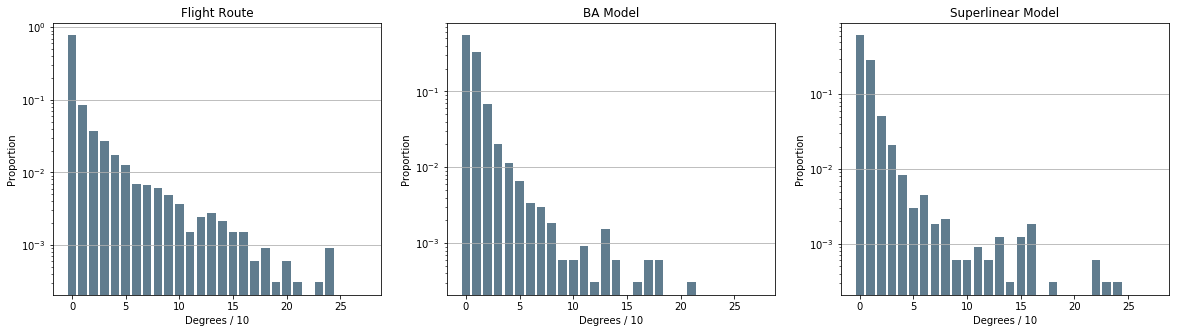

In [21]:
labels2 = ['Flight Route','BA Model','Superlinear Model']
data2 = [flight_degree_distr2,ba_degree_distr2,sp_degree_distr2]
figs2, axs2 = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for index, axes_index in enumerate(axs2):
    data_plot2 = data2[index]
    axes_index.bar(np.arange(len(data_plot2)),data_plot2,log=True,color='#607c8e')
    axes_index.set_xlabel('Degrees / 10')
    axes_index.set_ylabel('Proportion')
    axes_index.set_title(labels2[index])
    axes_index.grid(axis = 'y')
figs.suptitle('degree distribution historgrams for all three networks', fontsize = 20)

In [22]:
print('The KL divergence between flight routes and superlinear model is: {0:.2f}.'.format(
    kl_divergence(flight_degree_distr2, sp_degree_distr2)))

print('The KL divergence between flight routes and Barabási-Albert model is: {0:.2f}.'.format(
    kl_divergence(flight_degree_distr2, ba_degree_distr2)))

The KL divergence between flight routes and superlinear model is: 0.16.
The KL divergence between flight routes and Barabási-Albert model is: 0.23.


Are the results what you expected? Explain.

**Your answer here.**

Here we generated the superlinear model with exponential parameter a = 1.1.

Comparing the degree distribution plot of BA model and super linear model, we found out there were more huge hubs in superlinear model and still it kept many small degree nodes. The KL divergence supported this observation. KL divergence of super linear and true graph became smaller than that of BA model.


Superlinear Preferential Attachment network reflects some reality properties of flight route network. This model means that we have some large international airports with many routes, and the rest are regional airports with some routes to the surrounding and to the large international airports. This is in line with the real situation.